In [1]:
import os

base_dir = '/opt/ml/input/data/train/'
path = os.path.join(base_dir, 'imgaug/')
try:
    if not os.path.exists(path):
        os.makedirs(path)
except OSError:
    print("Error: Cannot create the directory {}".format(path))

In [2]:
import pandas as pd
import numpy as np

labels = pd.read_csv(base_dir + 'train.csv')
labels.head()

id  gender   race  age                    path
0  000001  female  Asian   45  000001_female_Asian_45
1  000002  female  Asian   52  000002_female_Asian_52
2  000004    male  Asian   54    000004_male_Asian_54
3  000005  female  Asian   58  000005_female_Asian_58
4  000006  female  Asian   59  000006_female_Asian_59

In [3]:
old_labels = labels.loc[labels.age >= 60, ['id', 'age', 'path']]
old_labels

id  age                    path
416   001038   60    001038_male_Asian_60
422   001043   60    001043_male_Asian_60
427   001047   60    001047_male_Asian_60
443   001063   60  001063_female_Asian_60
476   001101   60    001101_male_Asian_60
...      ...  ...                     ...
2168  005453   60  005453_female_Asian_60
2173  005459   60    005459_male_Asian_60
2175  005461   60  005461_female_Asian_60
2209  005504   60  005504_female_Asian_60
2217  005515   60  005515_female_Asian_60

[192 rows x 3 columns]

In [4]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

train_dir = os.path.join(base_dir, 'images/')
old_paths = []
for path in old_labels['path']:
    img_folder = glob(os.path.join(train_dir, path, '*'))
    for img in img_folder:
        old_paths.append((img, img.split('/')[-1].split('.')[0]))
old_paths[0]

('/opt/ml/input/data/train/images/001038_male_Asian_60/mask2.jpg', 'mask2')

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.Jpeg

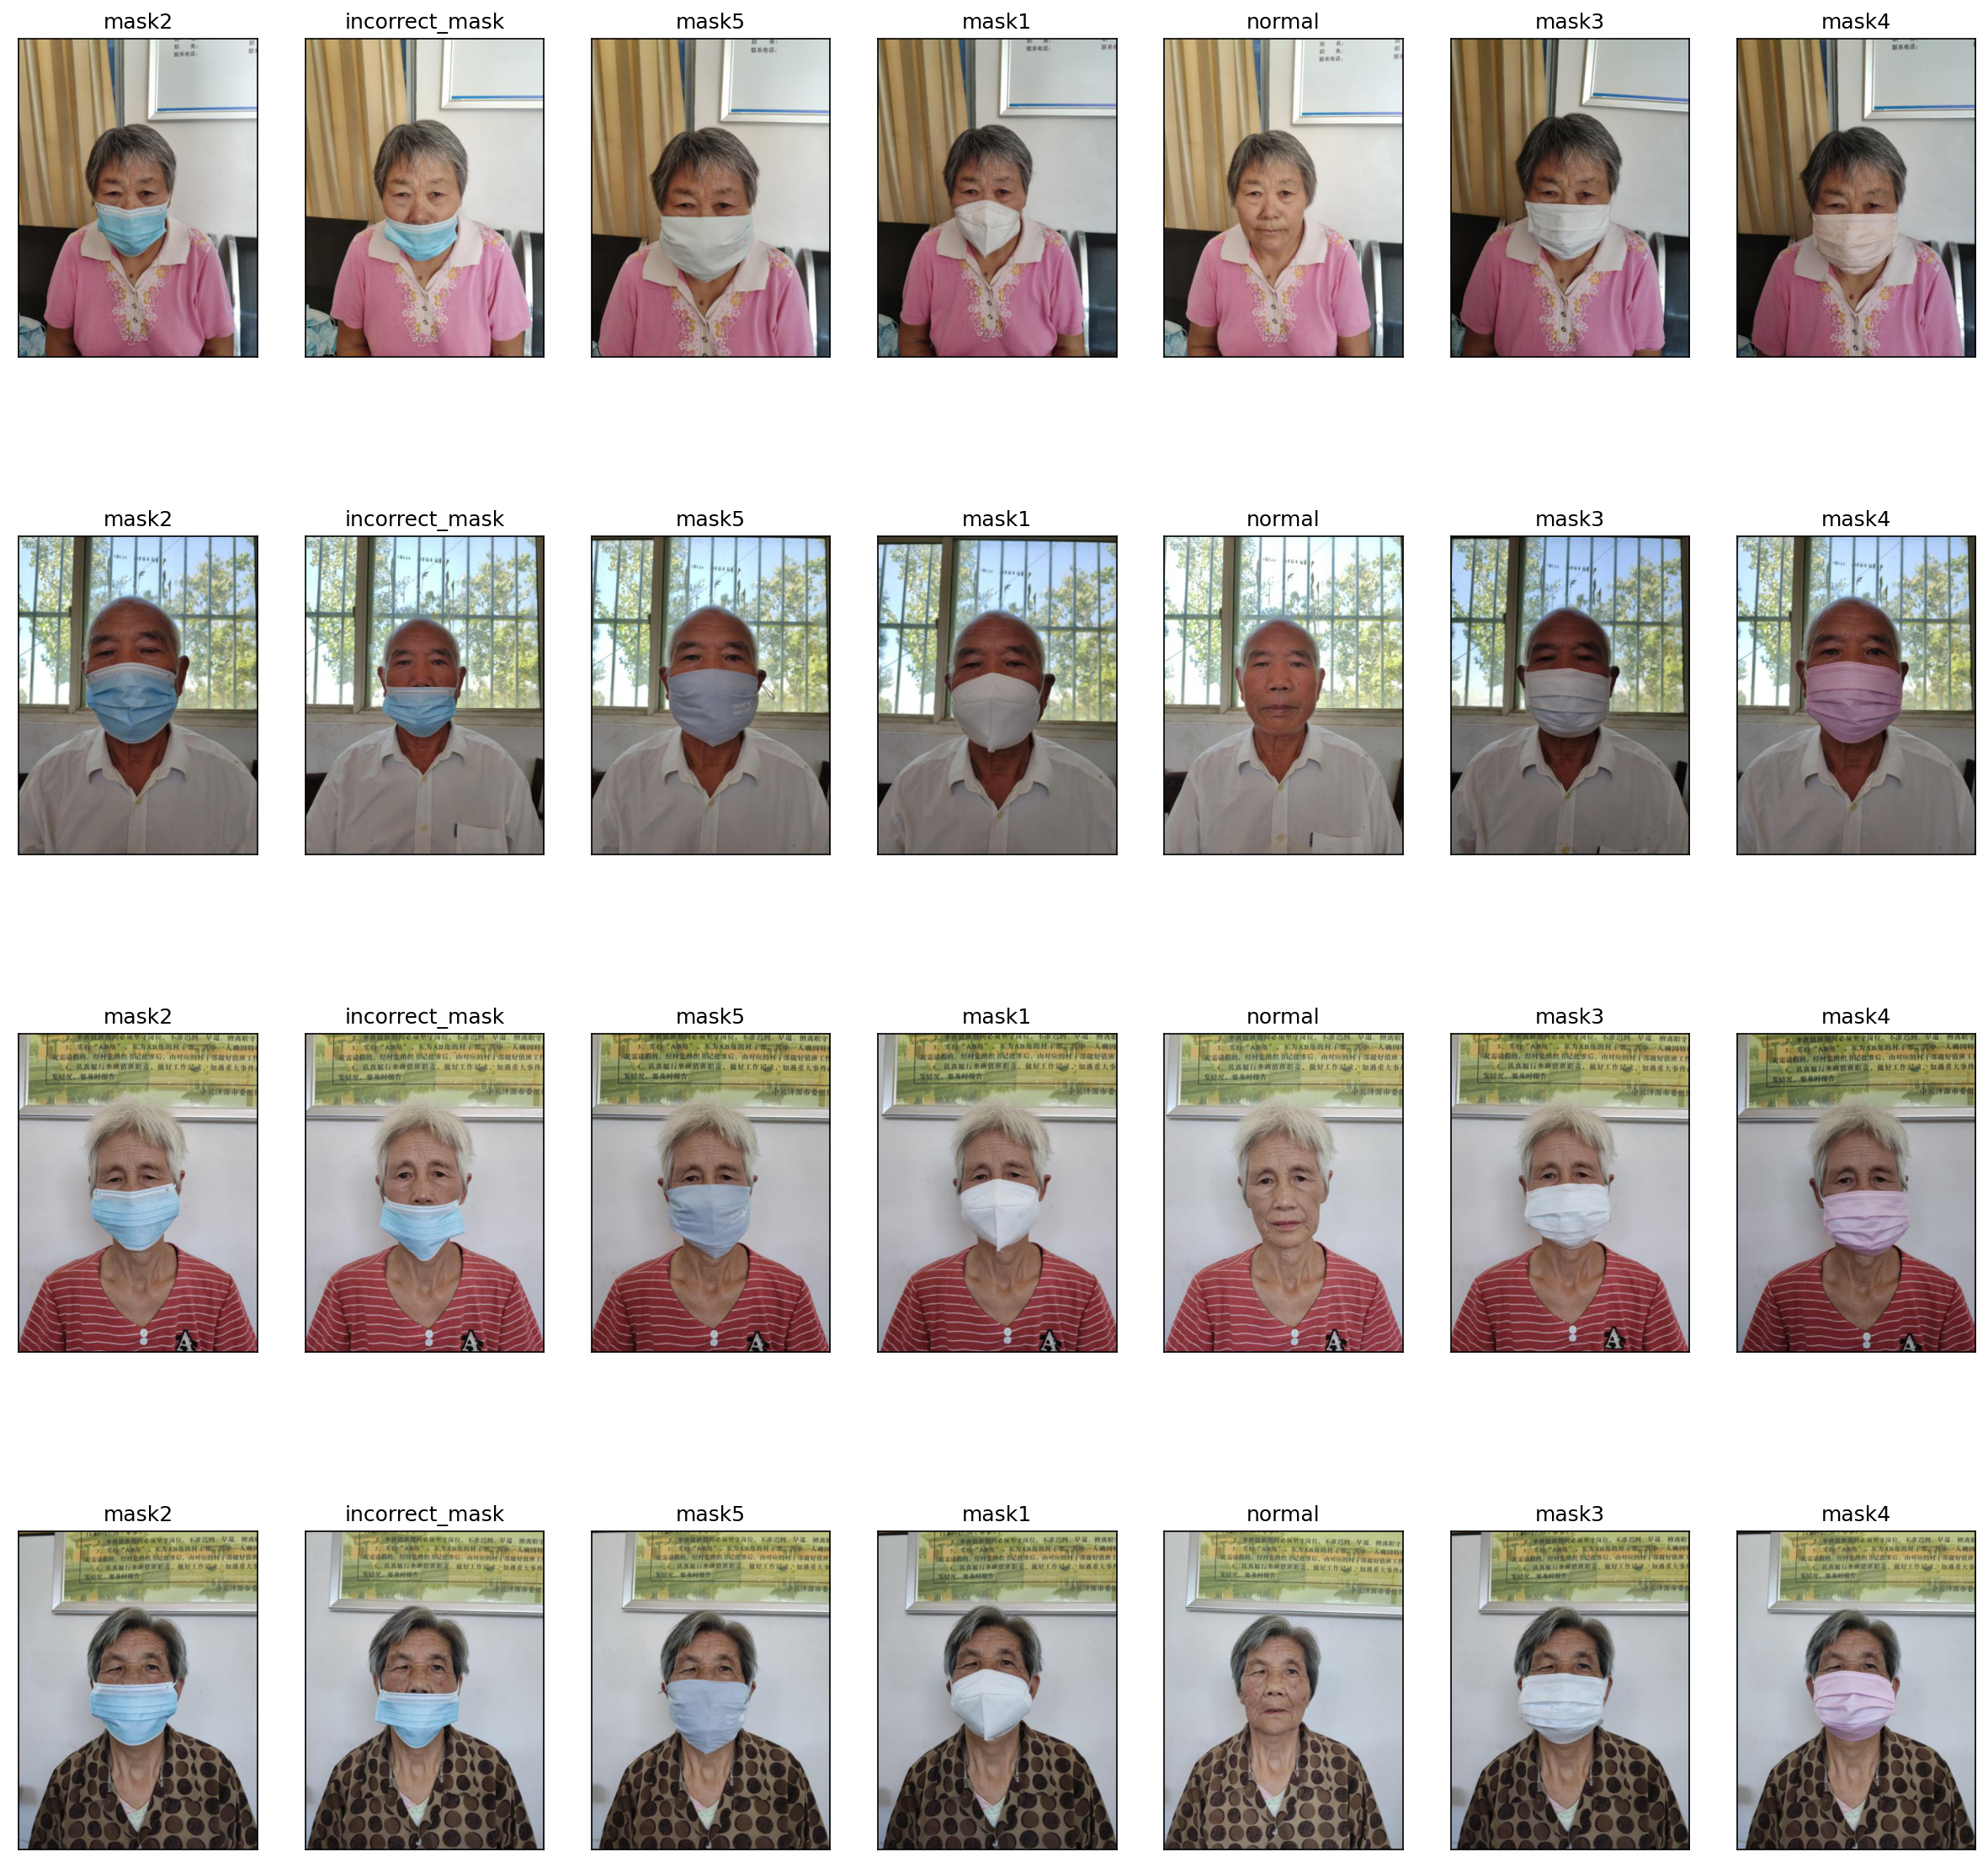

In [95]:
fig, axes = plt.subplots(4, 7, figsize=(20, 20), dpi=150)
for i in range(4):
    for j in range(7):
        n = j + 7*i + 84
        im = Image.open(old_paths[n][0])
#         print(type(im))
        axes[i][j].imshow(im)
        axes[i][j].get_xaxis().set_visible(False)
        axes[i][j].get_yaxis().set_visible(False)
        axes[i][j].set_title(old_paths[n][1])
plt.show()

In [5]:
import albumentations as A
from torchvision import transforms as T

transform = A.Compose([
    A.HorizontalFlip(p=1),
#     A.Resize(256, 256), 
#     A.RandomCrop(224, 224),
#     A.OneOf([
#           A.HorizontalFlip(p=1),
# #           A.RandomRotate90(p=1),
#           A.VerticalFlip(p=1)            
#     ], p=1),
    A.OneOf([
          A.MotionBlur(p=1),
          A.OpticalDistortion(p=1),
          A.GaussNoise(p=1)                 
    ], p=1),
#     albumentations.pytorch.ToTensor()
])

In [ ]:
transform_T = T.Compose([
    T.RandomHorizontalFlip(p=1),
    
])

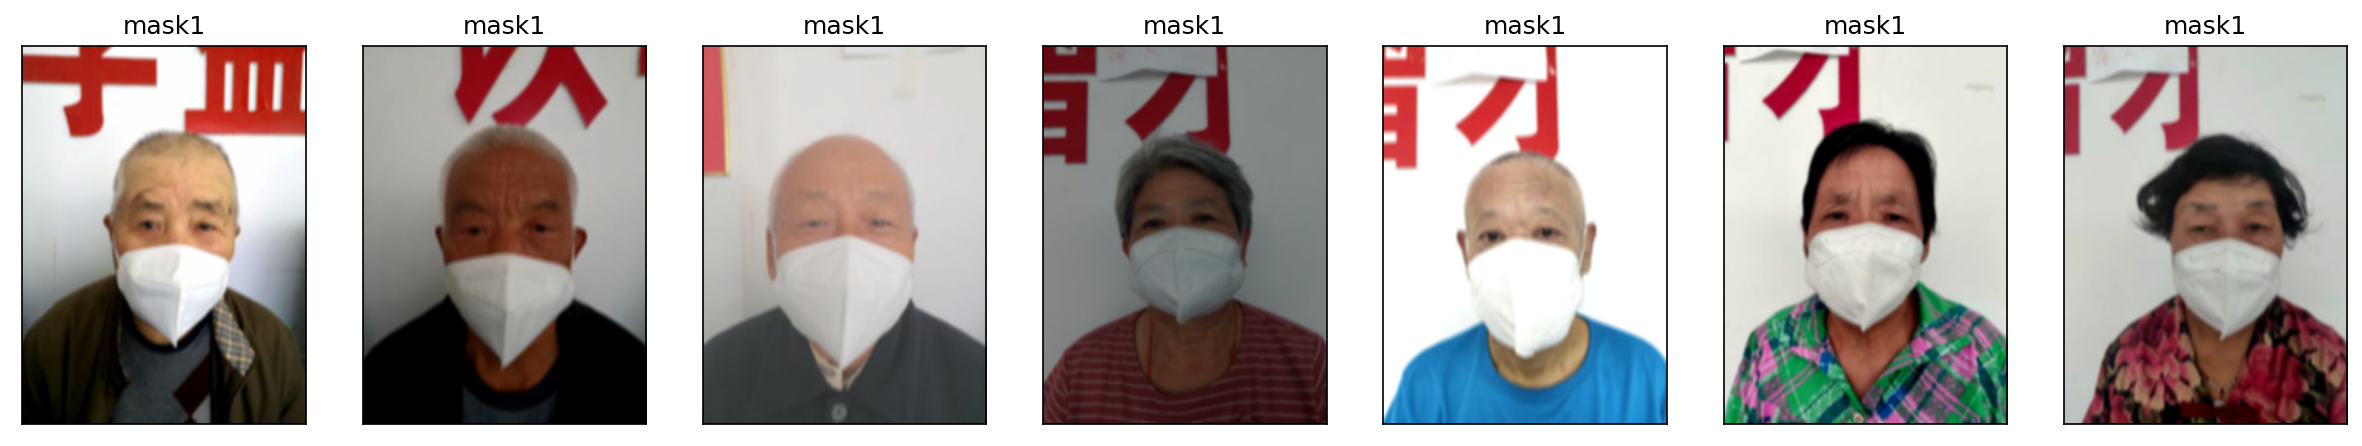

In [15]:
import cv2
import matplotlib.image as mpimg
import torchvision
import torchvision.transforms.functional as F

fig, axes = plt.subplots(1, 7, figsize=(20, 20), dpi=150)
for i in range(7):
    n = i*7 + 3
#     im = cv2.imread(old_paths[n][0])
#     im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = Image.open(old_paths[n][0])
#     im = T.functional.adjust_contrast(im,contrast_factor=1.6)
#     im = im['image']
    im = T.ColorJitter(brightness=0.4, contrast=0.6, saturation=0.1, hue=0.05)(im)
    im = T.GaussianBlur(kernel_size=(5, 9), sigma=(2, 5))(im)
#     im = F.RandomPosterize(bits=2)(im) 안됨
#     im = F.autocontrast()(im) 안됨
#     im = T.RandomPerspective(distortion_scale=0.15, p=1.0)(im)
    axes[i].imshow(im)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
    axes[i].set_title(old_paths[n][1])
plt.show()

# perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
# perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
# plot(perspective_imgs)

시도할 만한 transforms : (RandomHorizontalFlip(p=1) 기본 셋팅)
ColorJitter, GaussianBlur, RandomPosterize, RandomAdjustSharpness, RandomAutocontrast, RandomEqualize, AutoAugmentPolicy.SVHN

In [2]:
import pandas as pd
import seaborn as sns


In [3]:
age = pd.read_csv('/opt/ml/submission/age.csv')

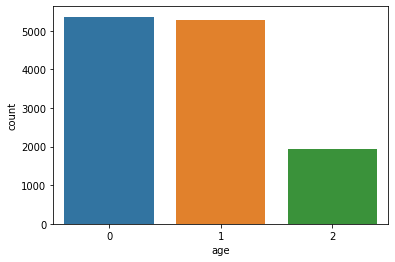

In [4]:
sns.countplot(x='age', data=age)